In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
import tensorflow as tf

In [66]:
from tensorflow.keras.models import Sequential

In [67]:
from tensorflow.keras.layers import Input, Flatten, Dense

In [68]:
df = pd.read_csv(r"C:\Users\Praveen Dev\Downloads\ANN Project\ANN Project\Dataset\concrete_data.csv")

In [69]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77


In [70]:
df.shape

(1030, 9)

## NaN

In [71]:
df.isna().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [72]:
df.isna().sum().sum()

np.int64(0)

In [73]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

## Error Detection

In [74]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


<Axes: >

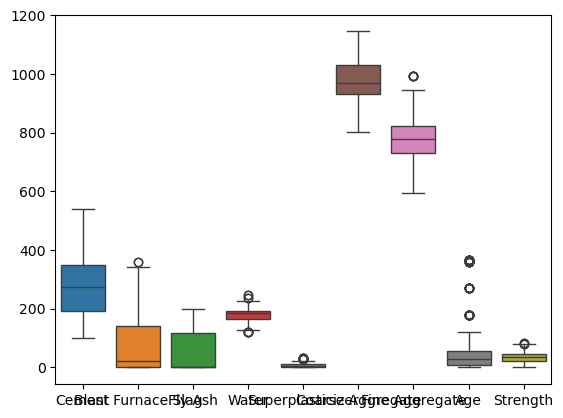

In [75]:
sns.boxplot(df)

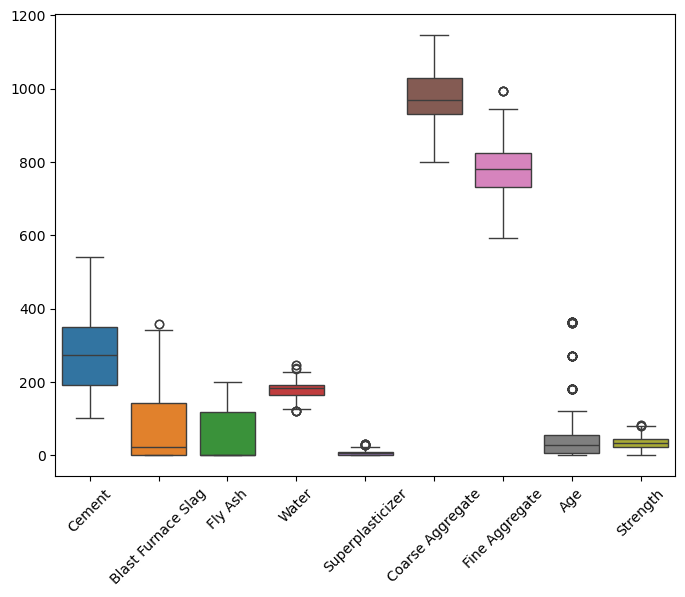

In [76]:
plt.figure(figsize = (8,6))
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

In [77]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [78]:
cols = [ 'Blast Furnace Slag',  'Water', 'Superplasticizer', 'Fine Aggregate']

In [79]:
cols

['Blast Furnace Slag', 'Water', 'Superplasticizer', 'Fine Aggregate']

In [80]:
for c in cols :
    print(c)

Blast Furnace Slag
Water
Superplasticizer
Fine Aggregate


In [81]:
for c in cols :
    q1 = df[c].quantile(0.25)
    q3 = df[c].quantile(0.75)
    iqr = q3-q1
    lower = q1 - (1.5 *iqr )
    upper = q3 + (1.5 * iqr )
    df[c] = df[c].map(lambda x : lower if x < lower else upper if x > upper else x)

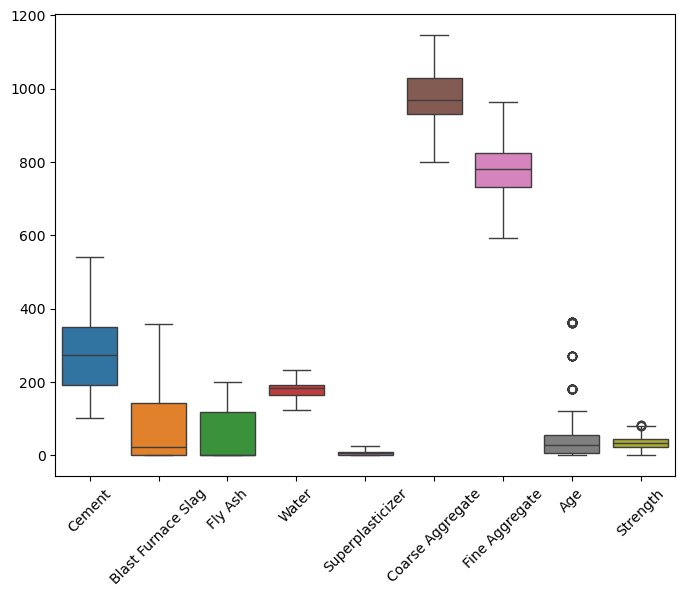

In [82]:
plt.figure(figsize = (8,6))
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

In [83]:
df["Age"]

0        28
1        28
2       270
3       365
4       360
       ... 
1025     28
1026     28
1027     28
1028     28
1029     28
Name: Age, Length: 1030, dtype: int64

In [84]:
q1_age = df["Age"].quantile(0.25)

In [85]:
q3_age = df["Age"].quantile(0.75)

In [86]:
iqr_age = q3_age - q1_age

In [87]:
lower_age = q1_age - (1.5 * iqr_age)

In [88]:
upper_age = q3_age + (1.5 * iqr_age)

In [89]:
lower_age

np.float64(-66.5)

In [90]:
upper_age

np.float64(129.5)

In [91]:
df[ df["Age"] < lower_age ]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength


In [92]:
df[ df["Age"] > upper_age ]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30
6,380.0,95.0,0.0,228.0,0.0,932.0,594.0,365,43.70
12,427.5,47.5,0.0,228.0,0.0,932.0,594.0,270,43.01
17,342.0,38.0,0.0,228.0,0.0,932.0,670.0,365,56.14
19,475.0,0.0,0.0,228.0,0.0,932.0,594.0,180,42.62
20,427.5,47.5,0.0,228.0,0.0,932.0,594.0,180,41.84
23,139.6,209.4,0.0,192.0,0.0,1047.0,806.9,180,44.21
24,380.0,0.0,0.0,228.0,0.0,932.0,670.0,365,52.52


In [93]:
df[ df["Age"] > upper_age ].count()

Cement                59
Blast Furnace Slag    59
Fly Ash               59
Water                 59
Superplasticizer      59
Coarse Aggregate      59
Fine Aggregate        59
Age                   59
Strength              59
dtype: int64

## Capping

In [94]:
df["Age"] = df["Age"].map(lambda x : lower_age if x < lower_age else upper_age if x > upper_age else x)

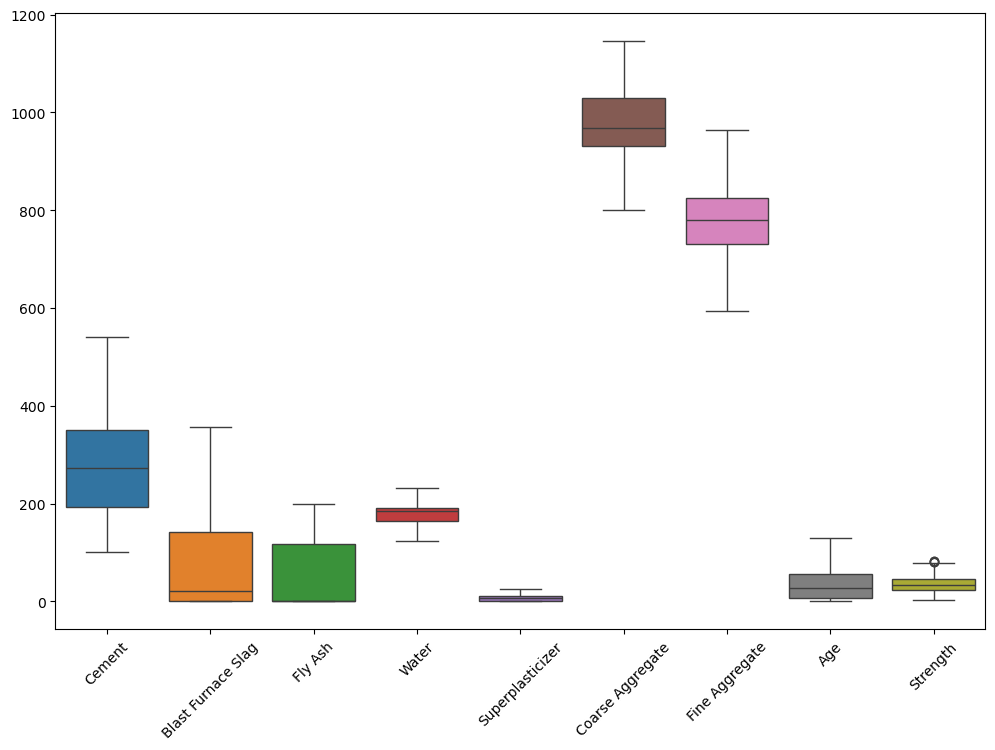

In [97]:
plt.figure(figsize = (12,8))
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

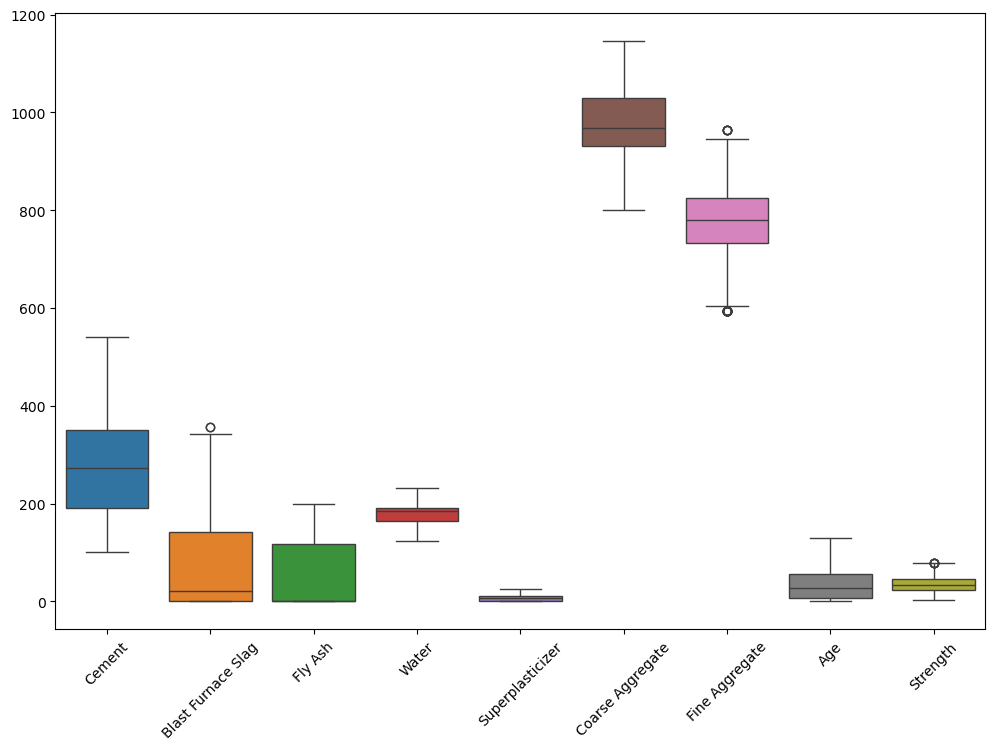

In [61]:
plt.figure(figsize = (12,8))
sns.boxplot(df)
plt.xticks(rotation = 45)
plt.show()

## Data Separation

In [98]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5,44.30
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0,44.28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0,31.18
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0,23.70
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0,32.77


In [100]:
df.drop("Strength",axis = 1)

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


In [101]:
X = df.drop("Strength",axis = 1)

In [102]:
X

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28.0
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28.0
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,129.5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,129.5
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28.0
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28.0
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28.0
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28.0


In [103]:
y = df["Strength"]

In [104]:
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: Strength, Length: 1030, dtype: float64

## Data Splitting

In [132]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [156]:
X.shape

(1030, 8)

In [157]:
X_train.shape

(824, 8)

In [158]:
X_test.shape

(206, 8)

## Scaling

In [159]:
from sklearn.preprocessing import StandardScaler

In [160]:
ss = StandardScaler()

In [161]:
ss

StandardScaler()

In [162]:
ss.fit(X_train)

StandardScaler()

In [163]:
X_train_ss = ss.transform(X_train)

In [164]:
X_test_ss = ss.transform(X_test)

In [165]:
X_train_ss

array([[-1.16087734,  0.85760247,  0.9824489 , ..., -0.25746155,
        -0.64866051, -0.27964442],
       [ 1.30862304, -0.60254668,  1.23259821, ..., -1.92694961,
        -0.27261827, -0.27964442],
       [-0.0768653 , -0.85568522,  1.06687429, ...,  1.01785948,
         0.06867419, -0.98804026],
       ...,
       [-0.86591441, -0.85568522,  1.12628475, ...,  1.34082214,
         0.33426177,  1.76053561],
       [ 1.78316909,  0.51126292, -0.83113361, ..., -1.54422615,
         0.11831673, -0.27964442],
       [ 0.28509237, -0.85568522,  0.9355459 , ..., -0.6172979 ,
         0.13693268, -0.27964442]])

In [166]:
X_train.shape

(824, 8)

In [167]:
X_train.shape[1]

8

## Model Building

In [168]:
from tensorflow.keras.models import Sequential

In [169]:
from tensorflow.keras.layers import Dense

In [170]:
smodel = Sequential()

In [171]:
smodel.add(Dense(64, activation = "relu", input_shape = (X_train.shape[1], )))

C:\Users\Praveen Dev\AppData\Roaming\Python\Python313\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [172]:
smodel.add(Dense(32, activation = "relu" ))

In [173]:
smodel.add(Dense(1))

In [174]:
smodel.compile( optimizer = "adam",
               loss = "mean_squared_error")

In [175]:
smodel.fit(X_train_ss, y_train, epochs = 30, validation_split = 0.2, verbose = 0) 

In [176]:
smodel.evaluate(X_test_ss, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 97.7332  


97.73320770263672

In [178]:
np.sqrt( 97.7332 )

np.float64(9.886010317615494)